# Evaluation of CRIER Experiments
### By Abduselam Shaltu 

Completed as part of CSE 455 Winter 2022 final project.


In [2]:
! git clone https://github.com/ashaltu/crier.git
% cd /content/crier/backend
! pip install -r requirements.txt


Cloning into 'crier'...
remote: Enumerating objects: 20375, done.
remote: Counting objects: 100% (20375/20375), done.
remote: Compressing objects: 100% (14881/14881), done.
remote: Total 20375 (delta 4575), reused 20331 (delta 4537), pack-reused 0
Receiving objects: 100% (20375/20375), 163.41 MiB | 27.75 MiB/s, done.
Resolving deltas: 100% (4575/4575), done.
/content/crier/backend
     |████████████████████████████████| 94 kB 3.1 MB/s 
     |████████████████████████████████| 11.2 MB 18.2 MB/s 
     |████████████████████████████████| 60.5 MB 129 kB/s 
     |████████████████████████████████| 10.7 MB 34.7 MB/s 
     |████████████████████████████████| 289 kB 82.6 MB/s 
     |████████████████████████████████| 133 kB 79.8 MB/s 
     |████████████████████████████████| 52 kB 1.5 MB/s 
     |████████████████████████████████| 899 kB 69.9 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
     |████████████████████████████████| 13.2 MB 72.5 MB/s 
     |███████████████████████████████

In [1]:
%cd /content/crier/backend

/content/crier/backend


In [ ]:
import os
import numpy as np
import evaluation
import random

In [ ]:
!rm -rf imagenette2-320

In [ ]:
!wget https://s3.amazonaws.com/fast-ai-imageclas/imagenette2-320.tgz
!tar zxvf imagenette2-320.tgz

In [ ]:
!wget https://s3.amazonaws.com/fast-ai-imageclas/imagewoof2-320.tgz
!tar zxvf imagewoof2-320.tgz
!mv imagewoof2-320 imagenette2-320

In [73]:
!cp -rf imagenette2-320 imagenette2-320-backup

In [ ]:
# Reorganize into same format as cifar and call that function.
# Data extracted from https://github.com/fastai/imagenette.
# Contains 9400 images in train and 4000 in validation
def extractSimilarImagesAnswersImagenette(imagenette_path):
  # Rename train to test

In [ ]:
! chmod 600 /content/crier/backend/kaggle.json
os.environ['KAGGLE_CONFIG_DIR'] = "/content/crier/backend"

In [ ]:
class_dirs = os.listdir('/content/crier/backend/cifar100-128/test')
dirs_counts = [len(os.listdir(os.path.join('/content/crier/backend/cifar100-128/test', dir))) for dir in class_dirs ]

for count in dirs_counts:
  if count != 100:
    print(count)

In [ ]:
'''
  The cifar_dir structure BEFORE:
    -cifar_dir
      -test
        -class0
          -img001.png
          -img002.png
          -img950.png
        -class7
          -img001.png
          -img002.png
          -img950.png
  
  similar_images is extracted as such:
    {
      dog: {'img103.png', ..., 'img481.png'}
      cat: {'img937.png', ..., 'img168.png'}
      ...
      airplane: {'img071.png', ..., 'img629.png'}
    }
  
  expected_paths is extracted as such:  # should align with actual_paths in terms of input to output
    [
      ['img103.png', ..., 'img481.png'], # retrieved images similar to dogs (a specific dog image)
      ['img937.png', ..., 'img168.png'], # retrieved images similar to cats (a specific cat image)
    ]

  AND the cifar_dir structure AFTER:
    -cifar_dir
      -index_corpus
        -img100001.png
        -img100002.png
        -img100950.png
      -test_corpus
        -img01.png
        -img02.png
        -img50.png

  Function also works with Imagenette, make sure to set original_dir_name
'''
def extractSimilarImagesAnswersCifarOrImagenette(cifar_dir, original_dir_name='test', per_class_num_index=95):
    # Need test_image_names (5 images in each class, total of 500 test imgs):
    # Make similar_images as mentioned above^
    # For each class dir, turn it's images into a list and shuffle
    # Turn entire test_corpus values into single list and shuffle (save into test_image_names).
    # While doing above step, generate expected_paths 
 
    # Also need to reorganize into new file structure
    os.mkdir(os.path.join(cifar_dir, "index_corpus"))
    os.mkdir(os.path.join(cifar_dir, "test_corpus"))

    test_image_paths = []
    expected_paths = []
    for dir in os.listdir(os.path.join(cifar_dir, original_dir_name)):
      class_img_names = os.listdir(os.path.join(cifar_dir, original_dir_name, dir))
      random.shuffle(class_img_names)

      for img_name in class_img_names[per_class_num_index:]:
        new_img_path = os.path.join(cifar_dir, "test_corpus", img_name)
        os.rename(os.path.join(cifar_dir, original_dir_name, dir, img_name), new_img_path)
        test_image_paths.append(new_img_path)

      sub_expected_paths = []
      for img_name in class_img_names[:per_class_num_index]:
        new_img_path = os.path.join(cifar_dir, "index_corpus", img_name)
        os.rename(os.path.join(cifar_dir, original_dir_name, dir, img_name), new_img_path)
        sub_expected_paths.append(new_img_path)
      expected_paths.append(sub_expected_paths)

    return test_image_paths, expected_paths


In [ ]:
test_image_names, expected_paths = extractSimilarImagesAnswersCifar('/content/crier/backend/cifar100-128')

In [ ]:
print(test_image_names[0:5])

['/content/crier/backend/cifar100-128/test_corpus/img5931.png', '/content/crier/backend/cifar100-128/test_corpus/img524.png', '/content/crier/backend/cifar100-128/test_corpus/img4052.png', '/content/crier/backend/cifar100-128/test_corpus/img4978.png', '/content/crier/backend/cifar100-128/test_corpus/img7588.png']


In [ ]:
!find /content/crier/backend/imagenette2-320/train/n02102040 -type f | wc -l 

955


In [ ]:
!rm -rf /content/crier/backend/cifar100-128
!cp -rf /content/crier/backend/cifar100-128-backup /content/crier/backend/cifar100-128

In [ ]:
!python evaluationn.py

In [ ]:
# Set load evaluation dataset.
use_cifar = True
print(f"Using cifar: {use_cifar}")
if use_cifar: # Should run on Google Colab.
  cifar_dir = "/content/crier/backend/cifar100-128"
  index_image_corpus = "/content/crier/backend/cifar100-128/index_corpus"  # 950 images per class to index
  test_image_corpus = "/content/crier/backend/cifar100-128/test_corpus"    # 50 images per class to test           
  test_image_names, expected_paths = extractSimilarImagesAnswersCifar(cifar_dir)
else:
  index_image_corpus = "example_image_corpus"
  test_image_corpus = "example_image_corpus"
  similarity_path = "test_image_corpus/similarity.txt"
  similar_images = extractSimilarImagesAnswers(similarity_path)
  test_image_names = os.listdir(test_image_corpus)
  expected_paths = [similar_images[img_name] for img_name in test_image_names]

num_results = 25

# Build Retrieval models.
hist_retriever = histogram.HistogramRetrieval(index_image_corpus, num_results)
crier_retriever = model.CRIER(token_manager.MODEL_NAME, token_manager.IMAGE_SIZE, num_results)
crier_retriever.create_engine(index_image_corpus)
crier_retriever.create_database(index_image_corpus)





Using cifar: True
Computing histograms...
Histograms computed.
Indexing embeddings... 
Successfully indexed embeddings.
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_5 (KerasLayer)  (None, 1280)              20331360  
                                                                 
Total params: 20,331,360
Trainable params: 0
Non-trainable params: 20,331,360
_________________________________________________________________
Finished indexing job on token: /content/crier/backend/cifar100-128/index_corpus


TypeError: ignored

In [ ]:
_, image_paths, distances = crier_retriever.search(index_image_corpus, test_image_name)

In [ ]:
!free -m

              total        used        free      shared  buff/cache   available
Mem:          26070         852       23204           1        2013       24933
Swap:             0           0           0


In [ ]:
import cv2
import matplotlib.image as mpimg
plt.imshow(mpimg.imread(test_image_name))
plt.show()
for img_path in image_paths:
  plt.imshow(mpimg.imread(img_path))
  plt.show()

In [ ]:
import cv2
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('/content/crier/backend/cifar100-128/index_corpus/img1956.png'))
plt.show()


Calculating MAP@k and MAR@k values for HistogramRetrieval and CRIER.

Metrics calculated.


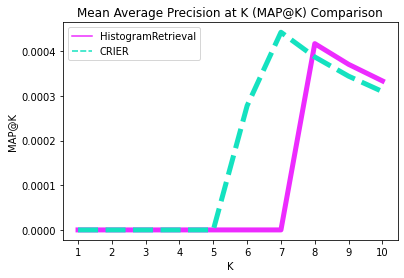

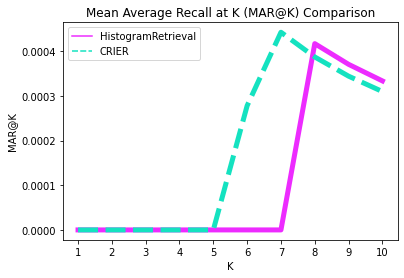

Saved MAP@k and MAP@k plots.


<Figure size 432x288 with 0 Axes>

In [ ]:
expected_paths = get_basenames(expected_paths)

# Run Hisogram-Retrieval on dataset, retrieve top-k images, and save total time.
hist_actual_paths = []
for test_image_name in test_image_names:
    test_image_path = os.path.join(test_image_corpus, test_image_name)
    _, image_paths, distances = hist_retriever.search(test_image_path)
    hist_actual_paths.append(image_paths)
hist_actual_paths = get_basenames(hist_actual_paths)

# Run CRIER on dataset, retrieve top-k images, and save total time.
crier_actual_paths = []
for test_image_name in test_image_names:
    _, image_paths, distances = crier_retriever.search(index_image_corpus, test_image_name)
    crier_actual_paths.append(image_paths)
crier_actual_paths = get_basenames(crier_actual_paths)

def calc_mapk(actual, expected, k):
    mapk = metrics.mapk(slice_columns(actual, k), slice_columns(expected, k))
    return mapk

def calc_mark(actual, expected, k):
    mark = recmetrics.mark(slice_columns(actual, k), slice_columns(expected, k))
    return mark

In [ ]:
# Evaluate Histogram and CRIER retrievers. Need to compare total times taken.
hist_mapks = []
hist_marks = []

crier_mapks = []
crier_marks = []

k_range = range(4, 21)
print(f"\nCalculating MAP@k and MAR@k values for HistogramRetrieval and CRIER.")
for k in k_range:
    hist_mapks.append(calc_mapk(hist_actual_paths, expected_paths, k))
    hist_marks.append(calc_mark(hist_actual_paths, expected_paths, k))
    
    crier_mapks.append(calc_mapk(crier_actual_paths, expected_paths, k))
    crier_marks.append(calc_mark(crier_actual_paths, expected_paths, k))
print(f"\nMetrics calculated.")

recmetrics.mapk_plot([hist_mapks, crier_mapks], ['HistogramRetrieval', 'CRIER'], k_range)
plt.savefig('mapks.png')

recmetrics.mark_plot([hist_marks, crier_marks], ['HistogramRetrieval', 'CRIER'], k_range)
plt.savefig('marks.png')

print(f"Saved MAP@k and MAP@k plots.")

#run(True)

In [ ]:
%cd /content/crier/backend
!cp -rf /content/crier/backend/cifar100-128-backup /content/crier/backend/cifar100-128

/content/crier/backend


In [7]:
!cp -rf /content/crier/backend/cifar100-128 /content/crier/backend/cifar100-128-backup

In [ ]:
!cp -rf /content/crier/backend/imagenette2-320 /content/crier/backend/imagenette2-320-backup

In [44]:
!rm -rf /content/crier/backend/imagenette2-320
!cp -rf /content/crier/backend/imagenette2-320-backup /content/crier/backend/imagenette2-320
!rm /content/crier/backend/imagenette2-320/noisy_imagenette.csv

In [26]:
%load_ext autoreload
%autoreload 2

In [74]:
!find /content/crier/backend/imagenette2-320/ -type f | wc -l 

26349


In [ ]:
%cd /content/crier/backend

/content/crier/backend


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!cp /content/drive/MyDrive/crier-cse-455-final/cifar100-128.zip .
!unzip cifar100-128.zip

In [ ]:
!cp /content/drive/MyDrive/crier-cse-455-final/cifar100-128.zip .
!unzip cifar100-128.zip

In [ ]:
!cp -rf /content/crier/backend/cifar100-128 /content/crier/backend/cifar100-128-backup

In [ ]:
!rm -rf /content/crier/backend/cifar100-128
!cp -rf /content/crier/backend/cifar100-128-backup /content/crier/backend/cifar100-128

In [ ]:
import evaluation
evaluation.run(use_cifar=True)

In [ ]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import ml_metrics as metrics
import recmetrics

# Local
import evaluation
import histogram
import model
import token_manager

In [32]:
%cd ..
!git pull
%cd backend

/content/crier
Already up to date.
/content/crier/backend


In [33]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

import ml_metrics as metrics
import recmetrics

# Local
import evaluation
import histogram
import model
import token_manager

In [60]:
use_cifar = True
use_imagenette = False

In [ ]:
    # Set load evaluation dataset.
    print(f"Using cifar: {use_cifar}")
    print(f"Using imagenette: {use_imagenette}")
    if use_cifar: 
      # Should run on Google Colab. Change cifar_dir, index_image_corpus, and test_image_corpus to wherever your data is.
      # Dataset available at: https://drive.google.com/file/d/1Zivf7cXpXAHPoVii0Mp3hecWJJx4ZBY_/view?usp=sharing
      # The used dataset is only the test dataset of https://www.kaggle.com/joaopauloschuler/cifar100-128x128-resized-via-cai-super-resolution.
      cifar_dir = "/content/crier/backend/cifar100-128"                        # Should exist already.
      index_image_corpus = "/content/crier/backend/cifar100-128/index_corpus"  # Will create this dir. 950 images per class to index.
      test_image_corpus = "/content/crier/backend/cifar100-128/test_corpus"    # Will create this dir. 50 images per class to test           
      test_image_names, expected_paths = evaluation.extractSimilarImagesAnswersCifarOrImagenette(cifar_dir)
    elif use_imagenette:
      # Should run on Google Colab. Change imagenette_dir, index_image_corpus, and test_image_corpus to wherever your data is.
      # Dataset available at: https://github.com/fastai/imagenette
      # The used dataset is only the test dataset of https://github.com/fastai/imagenette
      imagenette_dir = "/content/crier/backend/imagenette2-320"                        # Should exist already.
      index_image_corpus = "/content/crier/backend/imagenette2-320/index_corpus"  # Will create this dir. 950 images per class to index.
      test_image_corpus = "/content/crier/backend/imagenette2-320/test_corpus"    # Will create this dir. 50 images per class to test           
      test_image_names, expected_paths = evaluation.extractSimilarImagesAnswersCifarOrImagenette(imagenette_dir, 'train', 880)  
    else:
      index_image_corpus = "example_image_corpus"
      test_image_corpus = "example_image_corpus"
      similarity_path = "test_image_corpus/similarity.txt"
      similar_images = evaluation.extractSimilarImagesAnswers(similarity_path)
      test_image_names = os.listdir(test_image_corpus)
      expected_paths = [similar_images[img_name] for img_name in test_image_names]

    num_results = 25 if use_cifar or use_imagenette else 10
    k_range = range(1, 26) if use_cifar or use_imagenette else range(1, 11)
    output_mapk = "mapk_cifar.png" if use_cifar or use_imagenette else "mapk_custom.png"
    output_mark = "mark_cifar.png" if use_cifar or use_imagenette else "mark_custom.png"

    if use_imagenette:
      output_mapk = "mapk_imagenette.png"
      output_mark = "mark_imagenette.png"
    # Build Retrieval models.
    hist_retriever = histogram.HistogramRetrieval(index_image_corpus, num_results)
    crier_retriever = model.CRIER(token_manager.MODEL_NAME, token_manager.IMAGE_SIZE, num_results)
    crier_retriever.create_engine(index_image_corpus)
    crier_retriever.create_database(index_image_corpus)

    if use_cifar or use_imagenette: expected_paths = evaluation.get_basenames(expected_paths)

    # Run Hisogram-Retrieval on dataset, retrieve top-k images, and save total time.
    hist_actual_paths = []
    for test_image_name in test_image_names:
        test_image_path = os.path.join(test_image_corpus, test_image_name)
        _, image_paths, distances = hist_retriever.search(test_image_path)
        hist_actual_paths.append(image_paths)
    hist_actual_paths = evaluation.get_basenames(hist_actual_paths)

    # Run CRIER on dataset, retrieve top-k images, and save total time.
    crier_actual_paths = []
    for test_image_name in test_image_names:
        _, image_paths, distances = crier_retriever.search(index_image_corpus, test_image_name)
        crier_actual_paths.append(image_paths)
    crier_actual_paths = evaluation.get_basenames(crier_actual_paths)

    


Calculating MAP@k and MAR@k values for HistogramRetrieval and CRIER.

Metrics calculated.


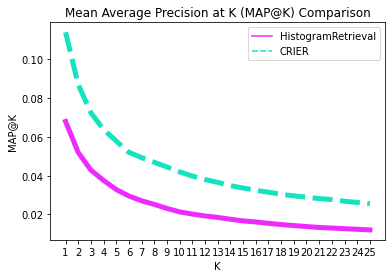

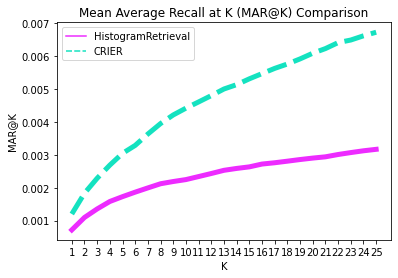

Saved MAP@k and MAP@k plots.


<Figure size 432x288 with 0 Axes>

In [62]:
# Evaluate Histogram and CRIER retrievers. Need to compare total times taken.
hist_mapks = []
hist_marks = []

crier_mapks = []
crier_marks = []

print(f"\nCalculating MAP@k and MAR@k values for HistogramRetrieval and CRIER.")
for k in k_range:
    hist_mapks.append(evaluation.calc_mapk(hist_actual_paths, expected_paths, k))
    hist_marks.append(evaluation.calc_mark(hist_actual_paths, expected_paths, k))
    
    crier_mapks.append(evaluation.calc_mapk(crier_actual_paths, expected_paths, k))
    crier_marks.append(evaluation.calc_mark(crier_actual_paths, expected_paths, k))
print(f"\nMetrics calculated.")

recmetrics.mapk_plot([hist_mapks, crier_mapks], ['HistogramRetrieval', 'CRIER'], k_range)
plt.savefig(output_mapk)

recmetrics.mark_plot([hist_marks, crier_marks], ['HistogramRetrieval', 'CRIER'], k_range)
plt.savefig(output_mark)

print(f"Saved MAP@k and MAP@k plots.")

In [65]:
possible_correct = len(expected_paths * np.max(k_range))
actually_correct = 0
worst_index = 10000000000
worst_count = 10000000000
for i in range(len(expected_paths)):
  num_correct = 0
  for actual_path in crier_actual_paths[i]:
    if actual_path in expected_paths[i]:
      actually_correct = actually_correct + 1
      num_correct = num_correct + 1
  if num_correct < worst_count:
    worst_index = i
    worst_count = num_correct

accuracy = actually_correct / possible_correct
print(f"Accuracy in recommendations: {accuracy}")

Accuracy in recommendations: 0.06392


In [67]:
len(expected_paths)

500

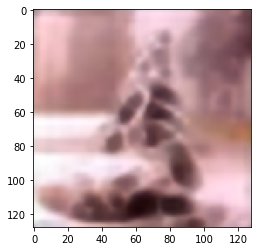

Predictions:


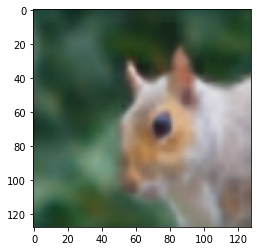

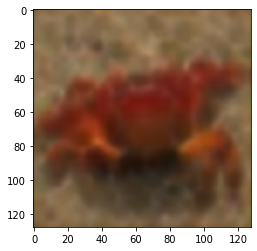

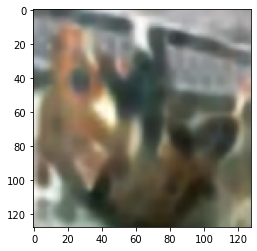

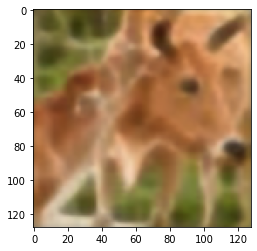

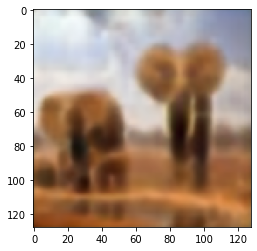

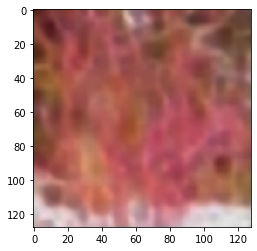

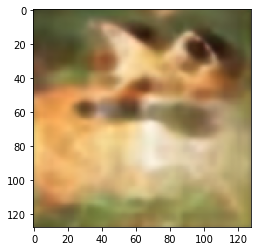

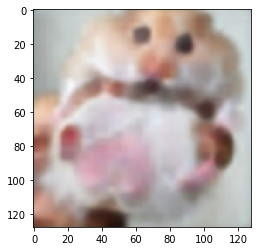

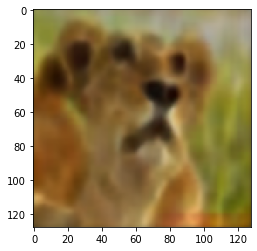

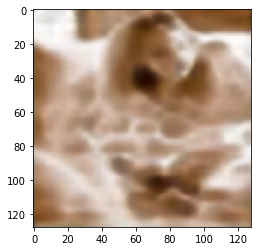

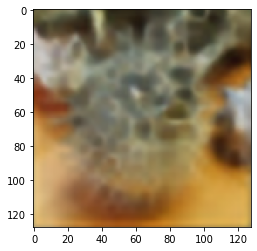

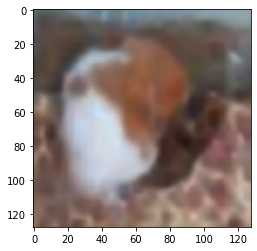

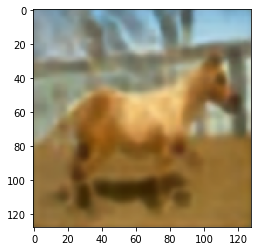

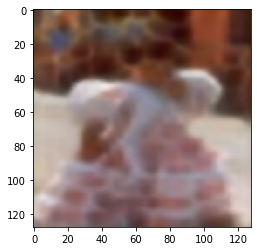

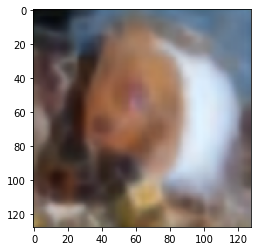

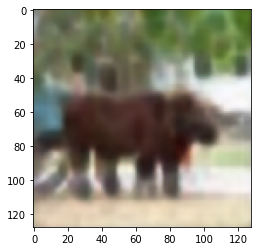

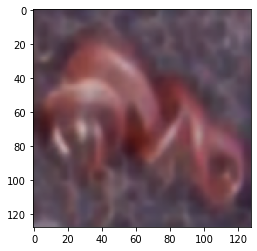

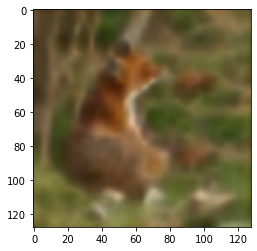

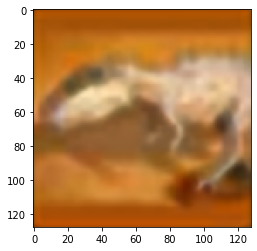

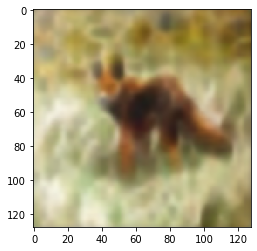

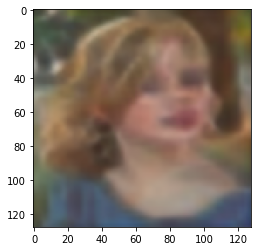

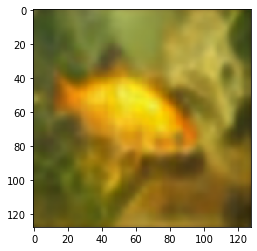

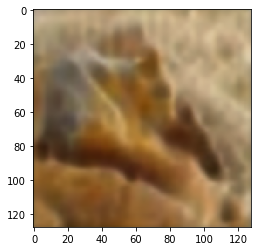

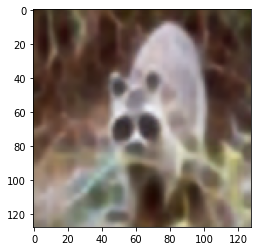

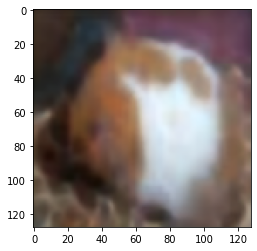

In [71]:
import cv2
import matplotlib.image as mpimg
plt.imshow(mpimg.imread(test_image_names[6]))
plt.show()
print("Predictions:")
for img_path in crier_actual_paths[6]:
  plt.imshow(mpimg.imread(os.path.join(cifar_dir, "index_corpus",img_path)))
  plt.show()

In [ ]:
#import cv2
import matplotlib.image as mpimg
for img_path in crier_actual_paths[9]:
  plt.imshow(mpimg.imread(os.path.join("imagenette2-320/index_corpus", img_path)))
  #plt.imshow(mpimg.imread(img_path))
  plt.show()

In [ ]:
import evaluation
evaluation.run(use_imagenette=True)